<a href="https://colab.research.google.com/github/prad69/MLAssignments/blob/main/Regression_Customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [17]:
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import precision_recall_curve

# Read Data from Google Drive

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
# Read the provided Excel file into a Pandas DataFrame. Skip the first row and use the second row as the header.
# TODO - write your solution here
file_path = '/content/drive/MyDrive/Colab Notebooks/datasets/Telco-Customer-Churn.csv'
data = pd.read_csv(file_path, header=0)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 




```
# This is formatted as code
```

Please find dataset from the uplevel link

Context
"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]



Content
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.



The data set includes information about:

Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents

In [21]:
# Remove data columns
data.drop(columns=['customerID'], inplace=True)
data['Churn'].replace(['Yes', 'No'],[0, 1], inplace=True)

In [22]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,1
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,1
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,1
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,1
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,1
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,1
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,0


# EDA


<Axes: xlabel='Churn', ylabel='TotalCharges'>

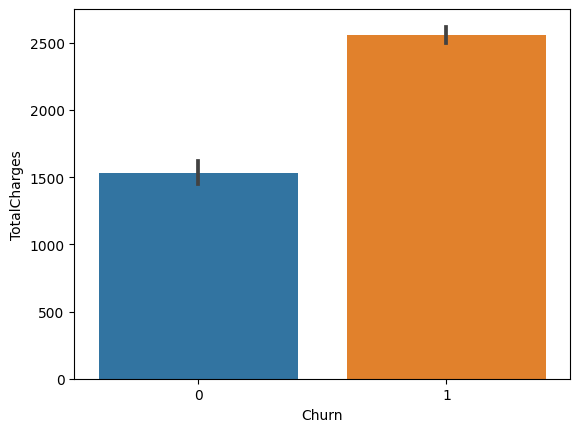

In [23]:
# Create a bar plot to visualize the distribution of the target variable 'Churn' in the given `data` DataFrame

sns.barplot(x='Churn' ,y ='TotalCharges',data=data)

**Task:** Analyze the churn rate by categorical features in the given `data` DataFrame. Create a bar plot for each categorical feature, showing the churn count for each category, with a figure size of (10, 4). Add a title "Churn by {column}" to each plot, where {column} is the name of the categorical feature.

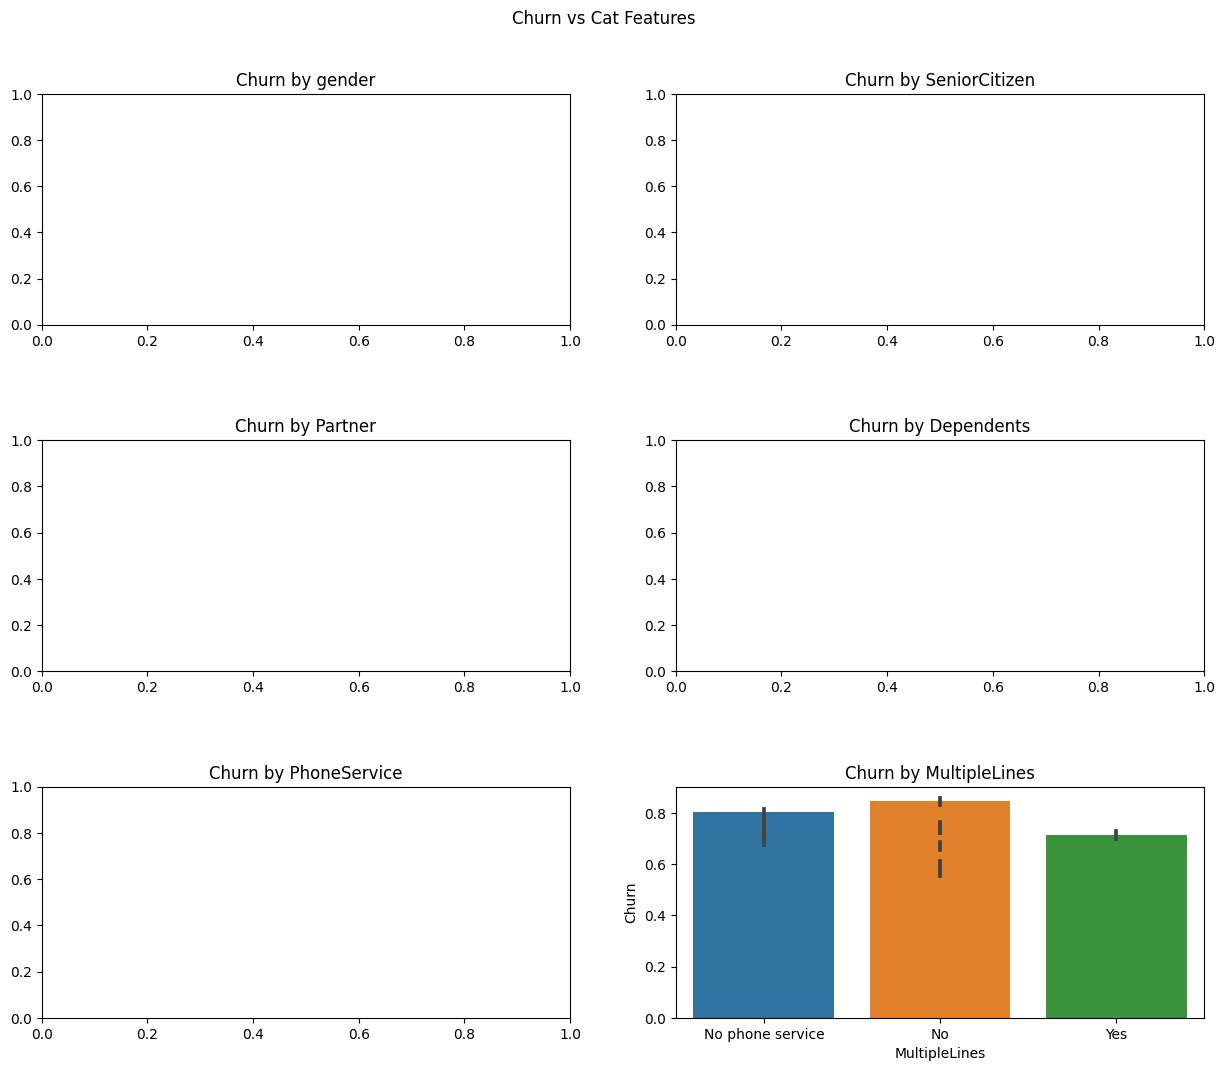

In [24]:
# Analyze churn rate by categorical features

ccol = [
    'gender' ,'SeniorCitizen', 'Partner']
categorical_columns = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]

# define subplot grid
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Churn vs Cat Features", fontsize=12, y=0.95)

for column, ax in zip(categorical_columns, axs.ravel()):
    sns.barplot(x=column, y='Churn', data=data)
    # chart formatting
    ax.set_title('Churn by '+ column)
plt.show()


**Task:** Analyze the churn rate by numeric features in the given `data` DataFrame. Create a histogram for each numeric feature, showing the churn count for each numeric value, with a figure size of (10, 4). Add a title "Churn by {column}" to each plot, where {column} is the name of the numeric feature. Also, include a kernel density estimate (kde) in the histograms.

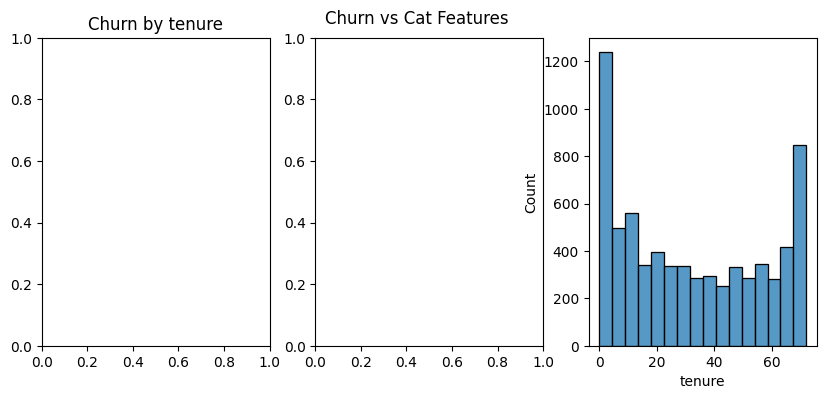

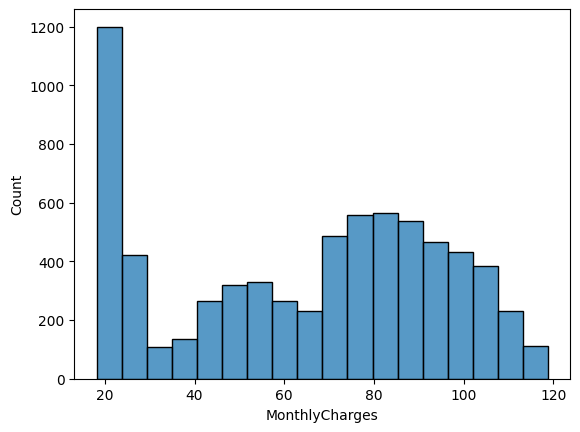

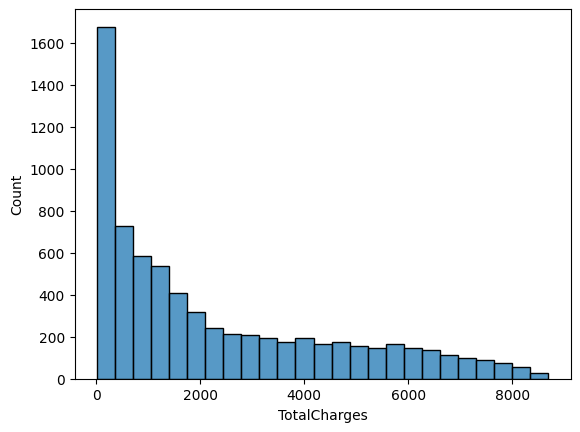

In [25]:
# Analyze churn rate by numeric features
numeric_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Churn vs Cat Features", fontsize=12, y=0.95)

for column, ax in zip(numeric_columns, axs.ravel()):
   sns.histplot(x=column, data=data)
    # chart formatting
   ax.set_title('Churn by '+ column)
   plt.show()


**Task:** Analyze the correlation between numeric features in the given `data` DataFrame. Create a heatmap to visualize the correlation matrix of the numeric features with a figure size of (8, 6). Use the "coolwarm" color map and add a title "Correlation Matrix" to the plot.

<ipython-input-26-cf820744cf54>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


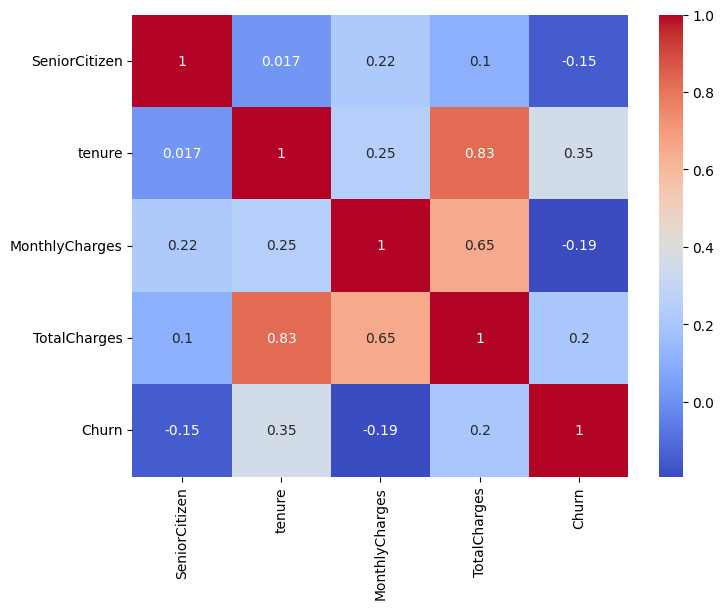

In [26]:
# Analyze the correlation between numeric features
corr = data.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

<Figure size 1000x400 with 0 Axes>

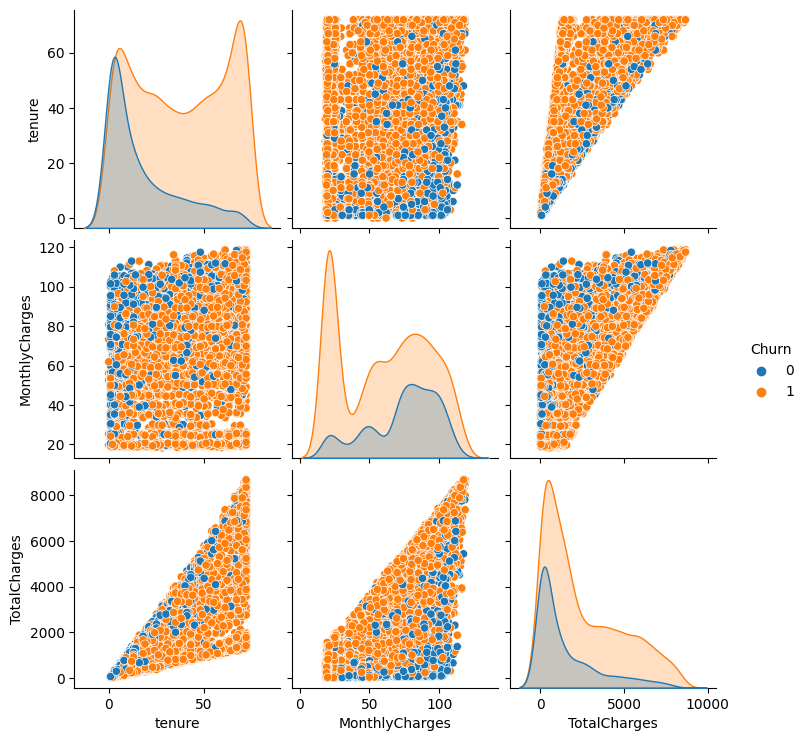

In [27]:
# Analyze the distribution of numeric features
plt.figure(figsize=(10, 4))
sns.pairplot(data[[*numeric_columns, 'Churn']], hue='Churn')
plt.show()

# Feature Engineering

**Task:** Convert the 'TotalCharges' column in the given `data` DataFrame to numeric values. Use the `pd.to_numeric` function and handle errors by setting them as 'coerce'. After converting the column, fill any missing values with the mean of the 'TotalCharges' column.

In [28]:
# Convert TotalCharges to numeric
data['TotalCharges']=pd.to_numeric(data['TotalCharges'])

data['TotalCharges'].fillna(value=data['TotalCharges'].mean(), inplace=True)


## Categorical Feature Handling

**Task:** One-hot encode the categorical features in the given `data` DataFrame. Use the `pd.get_dummies` function to create dummy variables for each categorical feature, and drop the first category for each feature.

In [29]:
# One-hot encode categorical features
categorical_columns = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]

data
data =  pd.get_dummies(data, columns=categorical_columns)
data.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two

In [35]:
# Encode the 'Churn' column
one_hot_encoded_data = pd.get_dummies(data, columns = ['Churn'])
one_hot_encoded_data.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', '

# Model Training

**Task:** Split the given `data` DataFrame into training and testing sets. Drop the 'customerID' and 'Churn' columns from the input features (X), and use the 'Churn' column as the target variable (y). Use a test size of 0.2 and a random state of 42.

In [41]:
# Split the dataset into train and test
from sklearn.model_selection import train_test_split

# Write your solution here

features = data.drop(["Churn"], axis=1)
target = data['Churn']
def split_data(data):
    return train_test_split(features, target, test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test = split_data(data)

**Task:** Scale the input features (X_train and X_test) using the StandardScaler from scikit-learn. Fit the scaler on the training data (X_train) and transform both the training and testing data.

In [ ]:
# Scale the data
scaler = StandardScaler()
X_train[continuous_features] = scaler.fit_transform(X_train[continuous_features])
X_test[continuous_features] = scaler.fit_transform(X_test[continuous_features])

**Task:** Build a logistic regression model using scikit-learn's LogisticRegression class. Fit the model on the training data (X_train and y_train) and make predictions on the testing data (X_test).

In [ ]:
# Build the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)


# Make predictions
y_pred = log_reg.predict(X_test)

**Task:** Calculate and print the following evaluation metrics for the logistic regression model: accuracy, precision, recall, F1-score, and AUC (Area Under the Curve).

In [ ]:
# Calculate the accuracy, confusion matrix, and classification report
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 =f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

# Print the results
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)
print("AUC: ", auc)

**Task:** Calculate the probability of the target class (class 1) using the logistic regression model. Then, calculate the precision and recall values for different thresholds and plot the Precision-Recall curve with markers at each point.

In [ ]:
# Calculate the probability of the target class (class 1)
y_prob = log_reg.predict_proba(X_test)[:, 1]

# Calculate precision and recall for different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Plot the Precision-Recall curve
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# HyperParameter Tuning

for parameter referes https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html




1. `'C'`: This parameter represents the inverse of regularization strength. Smaller values of `C` result in stronger regularization, which can help prevent overfitting by penalizing large coefficients in the model.

2. `'penalty'`: This parameter determines the type of regularization to be applied to the model. Regularization is used to prevent overfitting by penalizing large coefficients in the model. The `'l2'` penalty, also known as Ridge regularization, adds the squared magnitude of the coefficients to the loss function. In this case, you have specified only the `'l2'` penalty.

3. `'solver'`: This parameter specifies the optimization algorithm to be used for training the logistic regression model. Different solvers have different performance characteristics and may be more suitable for specific types of datasets or problems. In this case, you have specified five solvers:

   - `'newton-cg'`: Newton Conjugate Gradient, a second-order optimization method that approximates the Hessian matrix for efficient optimization. Suitable for large datasets and supports L2 regularization.
   - `'lbfgs'`: Limited-memory Broyden-Fletcher-Goldfarb-Shanno, a quasi-Newton method that also approximates the Hessian matrix. Suitable for small to moderately-sized datasets and supports L2 regularization. It is the default solver in scikit-learn.
   - `'liblinear'`: A linear solver that uses the coordinate gradient descent algorithm. Suitable for smaller datasets and supports both L1 and L2 regularization. However, it may have slower convergence for large datasets.
   - `'sag'`: Stochastic Average Gradient descent, an optimization algorithm that uses a random sample of the data at each iteration. Suitable for large datasets and supports L2 regularization.
   - `'saga'`: Stochastic Average Gradient descent with support for both L1 and L2 regularization. Suitable for large datasets and sparse data.

In [ ]:
# Custom parameter grid
param_grid = [
    {'penalty': ['l1'],
     'solver': ['liblinear', 'saga'],
     'C': [0.001, 0.01, 0.1, 1, 10],
     'max_iter': [1000, 5000],
     'class_weight': [None]
    },
    {'penalty': ['l2'],
     'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
     'C': [ 1, 10, 20, 50],
     'max_iter': [1000, 5000],
     'class_weight': [None]
    },
    {'penalty': ['elasticnet'],
     'solver': ['saga'],
     'C': [0.001, 0.01, 0.1, 1, 10, 50],
     'max_iter': [1000, 5000],
     'class_weight': [None],
     'l1_ratio': [0, 0.3, 0.5, 0.7, 1]
    }
]

**Task:** Create a custom parameter grid for tuning a logistic regression model using GridSearchCV with 5-fold cross-validation, and optimize for accuracy. Fit the grid search on the training data (X_train and y_train) and print the best parameters and the corresponding score. Evaluate the best model on the test set (X_test) and calculate the accuracy, precision, recall, F1-score, and AUC.

In [ ]:

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.2, random_state=42)



# Custom iterator for tqdm progress tracking
cv = KFold(n_splits=5)
cv_splits = list(cv.split(X_train, y_train))

# Build and tune the logistic regression model
log_reg = LogisticRegression()
grid_search = GridSearchCV(log_reg, param_grid, scoring='f1', cv=cv, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

In [ ]:
# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Calculate the accuracy, confusion matrix, and classification report
accuracy = accuracy_score(y_test, y_pred_best)
# Calculate precision, recall, F1-score, and AUC
precision = precision_score(y_test, y_pred_best)
recall = recall_score(y_test, y_pred_best)
f1 = f1_score(y_test, y_pred_best)
auc = roc_auc_score(y_test, y_pred_best)

# Print the results
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)
print("AUC: ", auc)